# 7. 앙상블 분석
## 예측력을 높이기 위해서 여러 번의 데이터 분할을 통해 구축된 다수의 모형을 결합하여 새로운 모형을 만드는 방법
<li>앙상블(Ensemble) 분석의 종류
   <ul>
  <li>배깅(Bagging)</li>
  <li>부스팅(Boosting)</li>
  <ol>
  <li>ADABoost (에이다부스트)</li>
  <li>XGBoost (XG부스트)</li>
  <li>Gradient Boost (그래디언트 부스트)</li>
  <li>LightGBM (라이트GBM)</li>
  </ol>
  <li>Random Forest (랜덤포레스트)-랜덤배깅(Random Bagging)</li>
  
   </ul>
   </li>

## 1) 부트스트랩
* 붓스트랩이란 원본 데이터와 같은 크기의 표본을 랜덤복원추출한 샘플 데이터

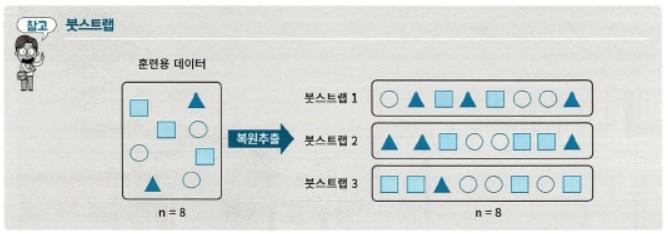

* 복원추출이기 때문에 하나의 붓스트랩에는 같은 데이터가 여러 번 추출될 수도 있다.

## 2) 배깅(Bootstrap Aggregating) - 다수결로 최고 점수의 모델 선정
* 여러 개의 붓스트랩 (Bootstrap)을 분석하고 결과를 집계하는 알고리즘
* 앙상블 분석에서 각각의 모델을 분류기 (classifier) 라고 부르며 흔히 의사결정나무를 사용
* 여러 개의 분류기에 의한 결과를 놓고 다수결에 의하여 최종 결광값을 선정하는 작업을 보팅 (voting)


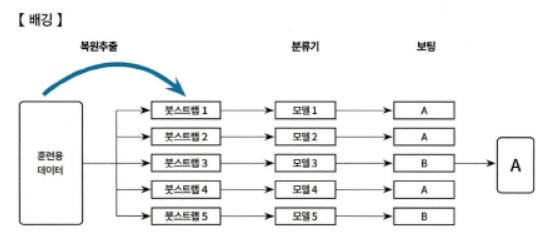

* 모델 1결과 = A
* 모델 2결과 = A
* 모델 3결과 = B
* 모델 4결과 = A
* 모델 5결과 = B

* 5개의 부트스트랩으로 5가지 모델로 분석 한 결과
* A가 3, B가 2로 나왔으므로 다수결에 의해서 결과는 A가 된다.

### (1) 배깅 실습

In [2]:
# 붓꽃 데이터 분할
index<-sample(1:2,150,replace=T,prob=c(0.7,0.3))
train<-iris[index==1,]
test<-iris[index==2,]

In [3]:
# 배깅
install.packages('adabag')
library(adabag)
result<-bagging(data=train,Species~.)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘iterators’, ‘caret’, ‘foreach’, ‘doParallel’


Loading required package: rpart

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



In [5]:
head(result, 2)

$formula
Species ~ .

$trees
$trees[[1]]
n= 91 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 91 53 virginica (0.28571429 0.29670330 0.41758242)  
  2) Petal.Width< 1.75 53 27 setosa (0.49056604 0.49056604 0.01886792)  
    4) Petal.Length< 2.7 26  0 setosa (1.00000000 0.00000000 0.00000000) *
    5) Petal.Length>=2.7 27  1 versicolor (0.00000000 0.96296296 0.03703704) *
  3) Petal.Width>=1.75 38  1 virginica (0.00000000 0.02631579 0.97368421) *

$trees[[2]]
n= 91 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 91 53 setosa (0.4175824 0.3076923 0.2747253)  
  2) Petal.Length< 2.6 38  0 setosa (1.0000000 0.0000000 0.0000000) *
  3) Petal.Length>=2.6 53 25 versicolor (0.0000000 0.5283019 0.4716981)  
    6) Petal.Length< 4.75 24  0 versicolor (0.0000000 1.0000000 0.0000000) *
    7) Petal.Length>=4.75 29  4 virginica (0.0000000 0.1379310 0.8620690) *

$trees[[3]]
n= 91 

node), split, n, loss, yval, (yprob)
      * denotes term

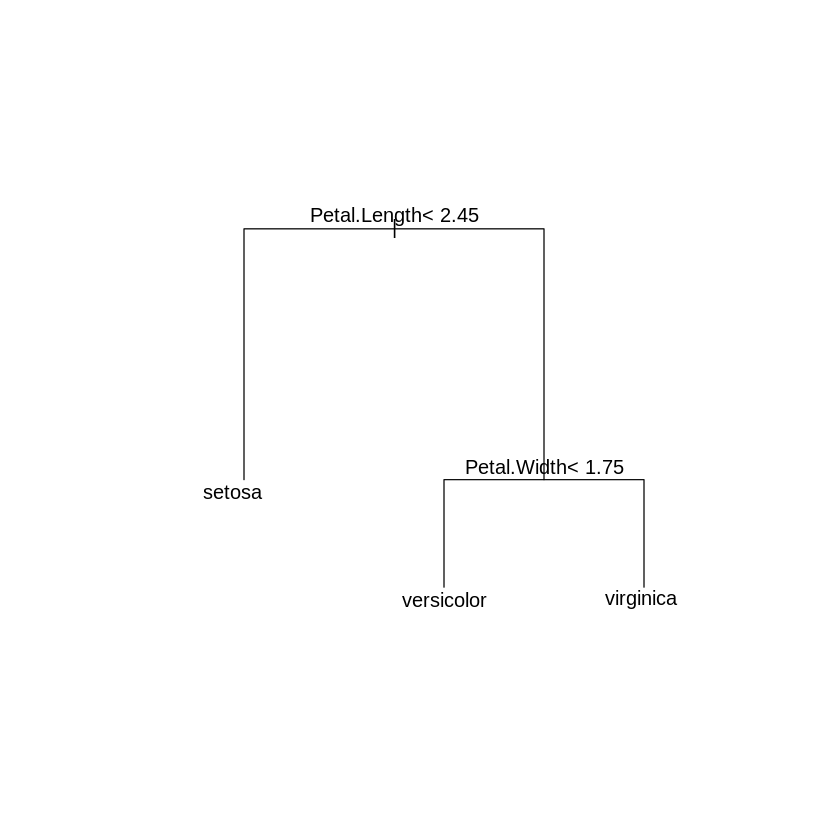

In [ ]:
# 첫번째 의사결정나무
plot(result$trees[[1]],margin=0.3)
text(result$trees[[1]])

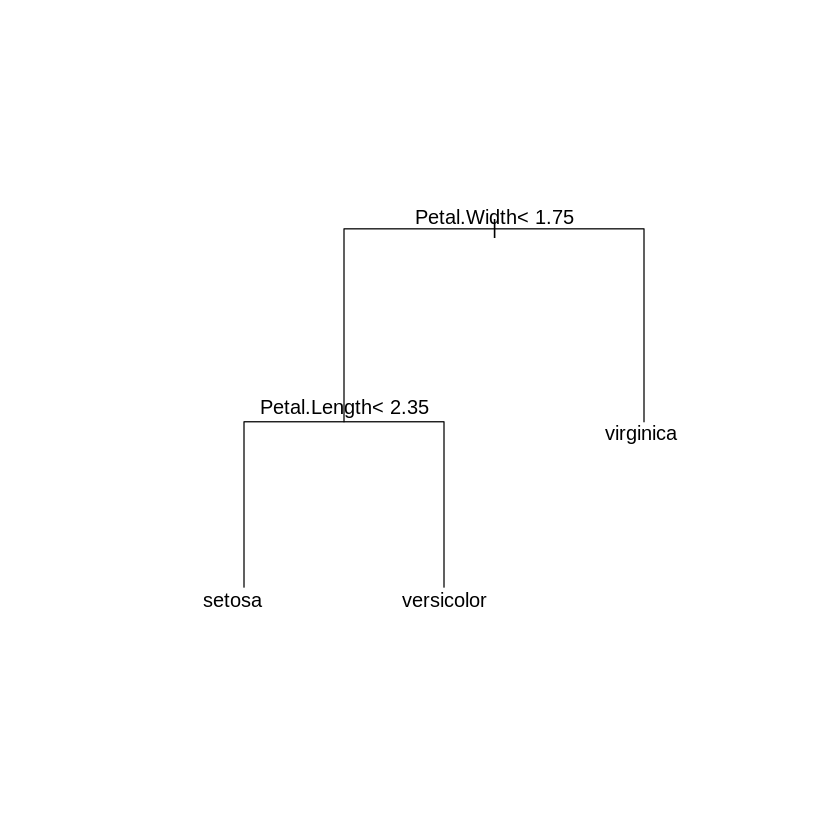

In [ ]:
# 100번재 의사결정나무
plot(result$trees[[100]],margin=0.3)
text(result$trees[[100]])


In [ ]:
# 모형 평가
pred<-predict(result,newdata=test,type='class')
table(test$Species,pred$class)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         0
  virginica       0          2        15

In [ ]:
pred$votes

100,0,0
100,0,0
100,0,0
100,0,0
100,0,0
100,0,0
100,0,0
100,0,0
100,0,0
100,0,0
100,0,0


In [ ]:
pred$confusion

               Observed Class
Predicted Class setosa versicolor virginica
     setosa         15          0         0
     versicolor      0         13         2
     virginica       0          0        15

## 3) 부스팅 - 잘못 분류한 것을 다시 분석해 단점 보완
* 부스팅은 여러 개의 모형을 구축한다는 점에서 배깅과 유사하지만， 배깅은 각 분류기(모벨)가 독립적인 데 반해，부스팅은독립적이지 않다.
* 부스팅은 이전 모댈을 구축한 뒤 다음 모댈을 구축할 때 이전 분류기에 의해 잘못 분류된 데이터에 더 큰 가중치를 주어 붓스트랩을 구성
* 따라서 약한 모델들을 결합하여 나감으로써 점차적으로 강한 분류기를 만들어 나가는 과정
* 붓스트랩을 재구성히는 과정에서 잘못 분류된 데이터에 더 큰 기중치를 주어 표본을 추출하기 때문에 훈련오차를 빠르게 줄일 수 있다. 예측 성능 또한 배깅보다 성능이 뛰어나다

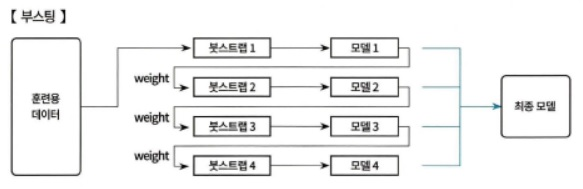

* 부트스트랩1을 분석한 모델 1에서 잘못 분류한 것들에 가중치를 두어 부트스트랩 2생성
* 부트스트랩2를 분석한 모델 2에서 잘못 분류한 것들에 가중치를 두어 부트스트랩 3생성
* 부트스트랩3을 분석한 모델 3에서 잘못 분류한 것들에 가중치를 두어 부트스트랩 4생성
* 부트스트랩4를 분석한 모델 4로 최종 모델

### (1) 부스팅의 종류
* 에이다부스팅(AdaBoosting)
* 그래디언트 부스트(Gradient Boost)
* 엑스지부스트(XGBoost)
* 라이트지비엠(Light GBM)

### (2) 부스팅 실습

In [ ]:
# 붓꽃 데이터 분할
index<-sample(1:2,150,replace=T,prob=c(0.7,0.3))
train<-iris[index==1,]
test<-iris[index==2,]

In [ ]:
# 부스팅
result<-boosting(data=train,Species~.,boos=T,mfinal=10)

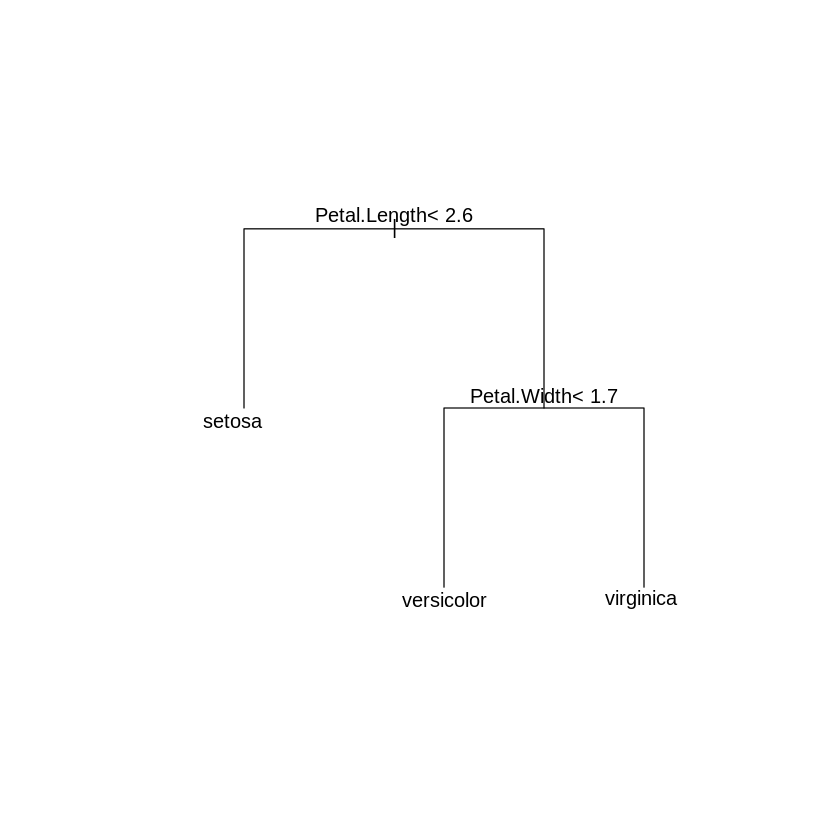

In [ ]:
# 첫번째 의사결정나무
plot(result$trees[[1]],margin=0.3)
text(result$trees[[1]])

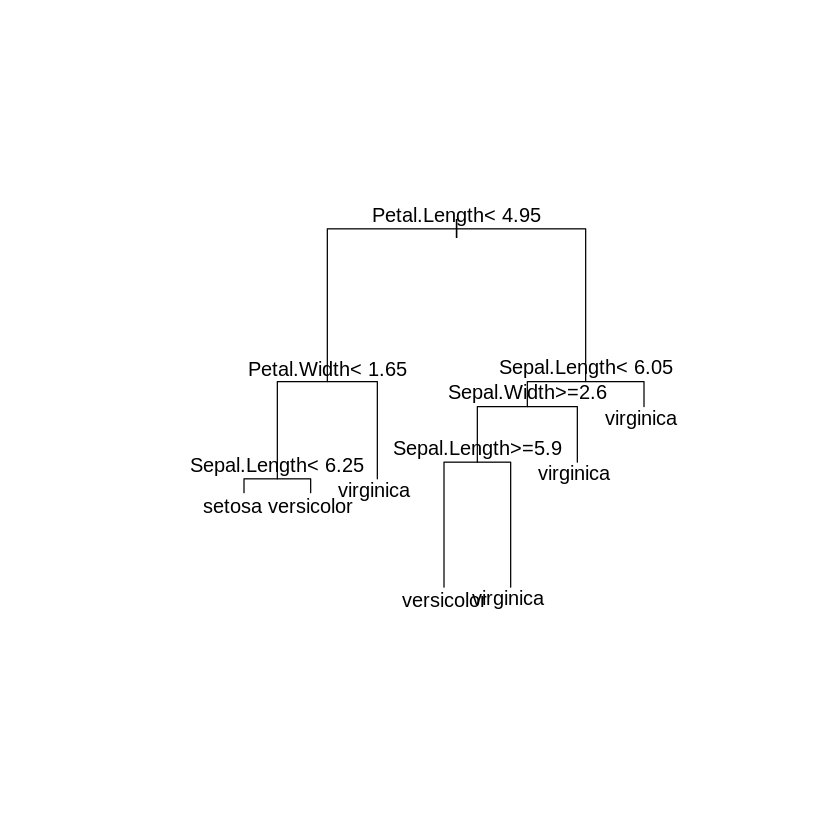

In [ ]:
# 가중치가 조정되면서 생성된 10번재 의사결정나무
plot(result$trees[[10]],margin=0.3)
text(result$trees[[10]])

In [ ]:
# 모형 평가
pred<-predict(result,newdata=test,type='class')
pred$confusion

               Observed Class
Predicted Class setosa versicolor virginica
     setosa         19          0         0
     versicolor      0         17         0
     virginica       0          2        14

## 4) 랜덤포레스트(Random Forest)
* 랜덤 포레스트(Random Forest)는 서로 상관성이 없는 나무들로 이루어진 숲을 의미
* 방법은 배깅과 유사하나 배깅에 더 많은 무작위성을 주는 분석 기법
* 많은 무작위성으로 생성된 서로 다른 여러 개의 트리로 구성
* 여러 개의 약한 트리들의 선형 결합으로 최종 결과를 얻는 모델
* **분류의 경우**에는 **다수결**로 최종 결과를 구함
* **회귀의 경우**에는 **평균 또는 중앙값**을 구하는 방법을 사용

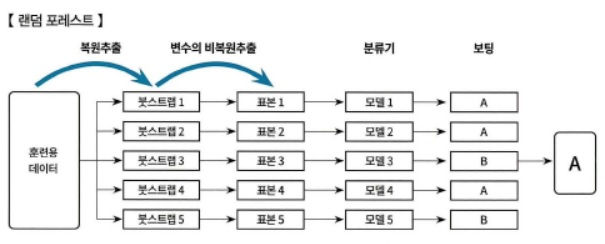

* 배깅에서는 각 붓스트랩을 활용뼈 트리를 구성할 때 트리의 모든 마디가 불순도가 제일 직아지는 최적의 분할을 실시
* 랜덤 포레스트는 각 마디에서 최적의 분할이 아닌 표본 추출 과정이 한 번 더 반복되어 추출된 표본을 대상으로 최적의 분할을 실시
* 랜덤 포레스트는 큰 분산을 갖고 있다는 의사결정나무의 단점을 보완하여 분산을 감소
* 모든 분류기들이 높은 비상관성을 갖기 때문에 일반화의 성능을 향상시킬 수 있다.
* 의사결정나무의 특징을 물려 받아 이상값에 민감하지 않다

### *** 부트스트랩에서 비복원추출로 표본 추출을 한 번 더 한다는 것이 가장 큰 특징

### (1) 랜덤포레스트(Random Forest) 실습

In [ ]:
# 붓꽃 데이터 분할
index<-sample(1:2,150,replace=T,prob=c(0.7,0.3))
train<-iris[index==1,]
test<-iris[index==2,]

In [ ]:
# 랜덤포레스트
install.packages('randomForest')
library(randomForest)
result<-randomForest(data=train,Species~.,ntree=100)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
# 모형 평가
pred<-predict(result,newdata=test,type='class')
table(condition = test$Species, pred)

            pred
condition    setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         18         1
  virginica       0          0         9